In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

/Users/jan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Sections of notebook

### <a href='#section1'>1. EDA</a>
### <a href='#section2'>2. Data Wrangling</a>
### <a href='#section3'>3. Models with sensitive attributes</a>
### <a href='#section4'>4. Models without sensitive attributes</a>
### <a href='#section5'>5. Disparate impact: Plotting ROC curves</a>


<a id='section1'></a>

## EDA

In this section we will be performing an initial exploration of the data, comparing the demographics of the sample population to those of the overall Taiwan population.

In [2]:
# import data and check dimensions
df = pd.read_csv("data/data.csv")
df.shape

(30000, 25)

In [3]:
df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# check descriptive statistics
df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
# check for completeness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
id            30000 non-null int64
limit_bal     30000 non-null int64
sex           30000 non-null int64
education     30000 non-null int64
marriage      30000 non-null int64
age           30000 non-null int64
pay_0         30000 non-null int64
pay_2         30000 non-null int64
pay_3         30000 non-null int64
pay_4         30000 non-null int64
pay_5         30000 non-null int64
pay_6         30000 non-null int64
bill_amt_1    30000 non-null int64
bill_amt_2    30000 non-null int64
bill_amt_3    30000 non-null int64
bill_amt_4    30000 non-null int64
bill_amt_5    30000 non-null int64
bill_amt_6    30000 non-null int64
pay_amt_1     30000 non-null int64
pay_amt_2     30000 non-null int64
pay_amt_3     30000 non-null int64
pay_amt_4     30000 non-null int64
pay_amt_5     30000 non-null int64
pay_amt_6     30000 non-null int64
default       30000 non-null int64
dtypes: int64(25

In [6]:
# list of variables
df.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1', 'bill_amt_2',
       'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6',
       'default'],
      dtype='object')

In [7]:
# divide variables into categorical and continuous 
# (bar plot vs. histogram)

cols_bar = list(['sex', 'education', 'marriage', 'pay_0',
       'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default'])

cols_hist = list(['limit_bal', 'age','bill_amt_1', 'bill_amt_2',
       'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1',
       'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])

In [8]:
# set all values considered "others" for education to 0 (just one category)
df.loc[df['education'].isin(list([4,5,6])), 'education'] = 0 

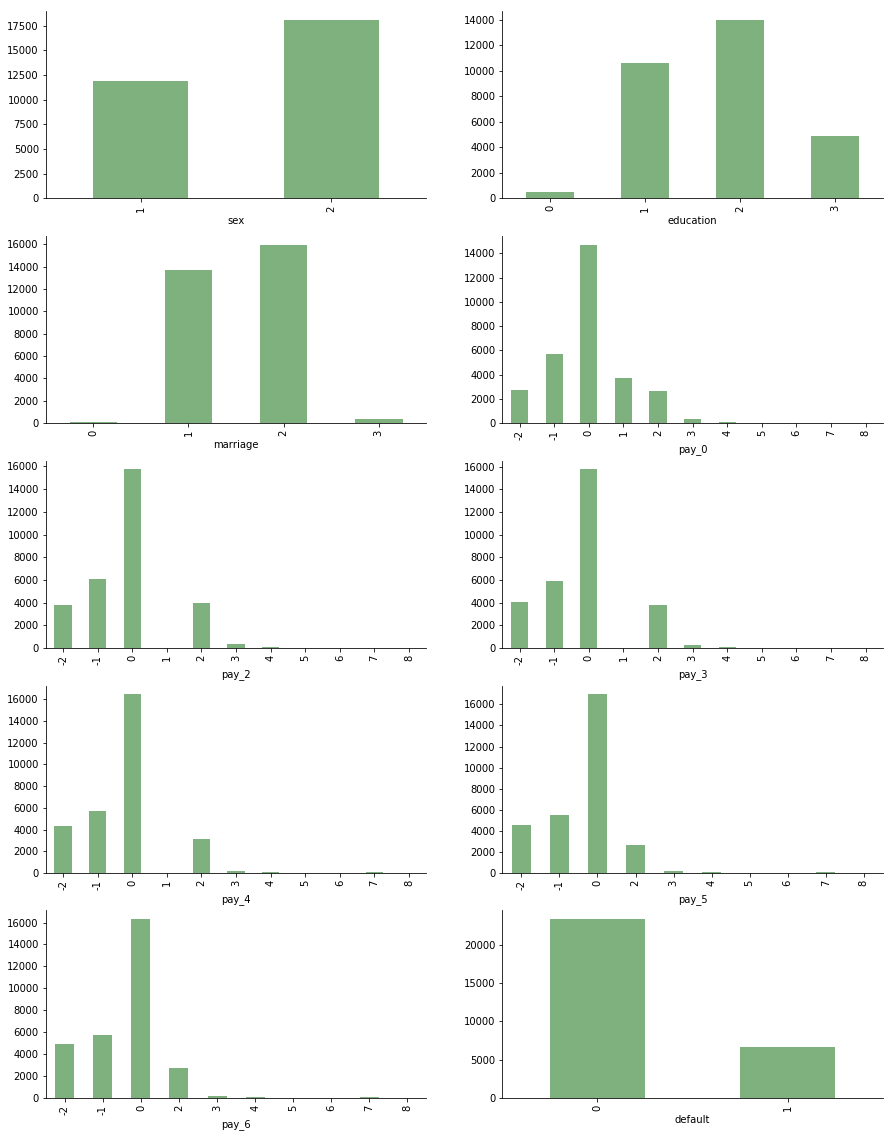

In [9]:
# plot categorical variables

fig, ax = plt.subplots(5,2, figsize=(15,20))
ax = ax.flatten()

for i in range(len(cols_bar)):
    df.groupby(cols_bar[i]).count()["id"].plot.bar(color='darkgreen', ax=ax[i], alpha=0.5);
    sns.despine()

The variables were as following:

- Credit limit: amount of credit offered to the credit card owner.
- Gender: gender of the credit card holder; categories: male (1) or female (2).
- Education: educational attainment of the credit card holder; categories: graduate school (1), university (2), high school (3), others (0, 4, 5, 6).
- Marital status: marital status of the credit card holder; categories: married (1), single (2), divorced (3), others (0).
- Age: age of the credit card holder.
- History of payment: payment records for the previous 6 months, from April to September; categories: no consumption (-2), paid in full (-1), use of revolving credit (0), payment delay for one month (1), payment delay for 2 months (2), etc. 
- Amount of bill statement: amount of bill statements for the previous six months.
- Amount of previous payment: amount of payment for bills in the previous six months.

We can see above that most people use revolving credit from month to month, and that few have late payments, with the number of credit card owners decreasing overall as the delay increases.

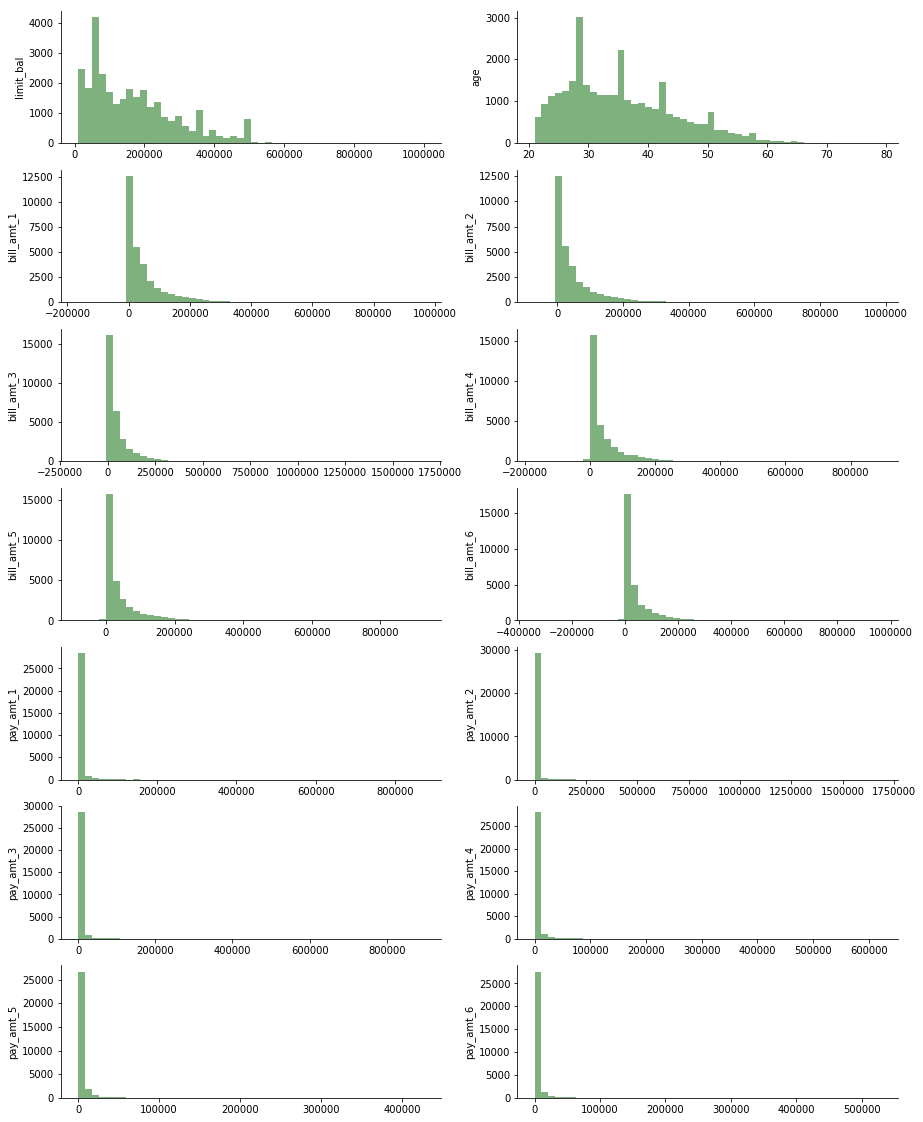

In [10]:
# plot continuous variables

fig, ax = plt.subplots(7,2, figsize=(15,20))
ax = ax.flatten()

for i in range(len(cols_hist)):
    df[cols_hist[i]].plot.hist(bins=50, ax=ax[i], color='darkgreen', alpha=0.5)
    sns.despine()
    ax[i].set_ylabel(str(cols_hist[i]))

### Comparing to Taiwan demographics

In [11]:
# import age data for Taiwan

age_df = pd.read_csv("data/age.csv")
age_df["freq"] = age_df["n"] / age_df["n"].sum()

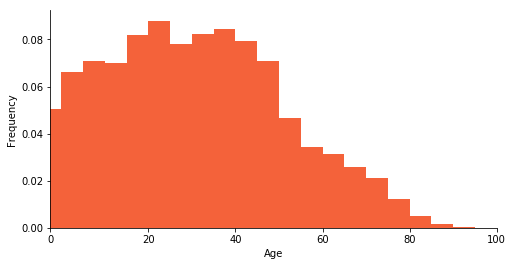

In [12]:
# create histogram of age over the entire Taiwan population

plt.figure(figsize=(8,4))
age_df["freq"].plot.bar(color="#f4623a", width=1)
plt.xlim([0,20])
plt.xticks([0, 4.5, 8.5, 12.5, 16.5, 20.5],["0","20", "40", "60", "80", "100"])
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.xlabel("Age")
sns.despine()
plt.savefig("docs/img/population_age.png")

In [13]:
print("Population age distribution")
for i, row in enumerate(age_df["freq"]):
    print("{}-{}: {:.4f}".format(i, i+4, row))

Population age distribution
0-4: 0.0503
1-5: 0.0660
2-6: 0.0708
3-7: 0.0698
4-8: 0.0819
5-9: 0.0879
6-10: 0.0782
7-11: 0.0821
8-12: 0.0845
9-13: 0.0794
10-14: 0.0706
11-15: 0.0467
12-16: 0.0343
13-17: 0.0314
14-18: 0.0258
15-19: 0.0211
16-20: 0.0121
17-21: 0.0049
18-22: 0.0017
19-23: 0.0003
20-24: 0.0001


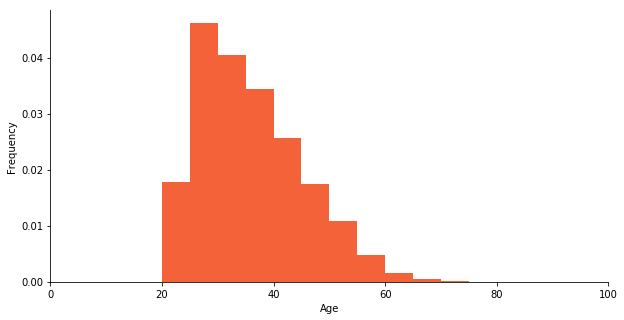

In [14]:
# re-do histogram of age in our dataset

plt.figure(figsize=(10,5))
df["age"].plot.hist(bins=20, range=(0,100), color='#f4623a', density=True)
plt.xlim([0,100])
plt.ylim()
plt.xlabel("Age")
sns.despine()
plt.savefig("docs/img/credit_age.png")

In [15]:
print("Credit data age distribution")
for i in range(0,100,5):
    print("{}-{}: {:.4f}".format(i, i+5, len(df[(df["age"] > i) & (df["age"] < i+5)])/30000))

Credit data age distribution
0-5: 0.0000
5-10: 0.0000
10-15: 0.0000
15-20: 0.0000
20-25: 0.0895
25-30: 0.1916
30-35: 0.1561
35-40: 0.1349
40-45: 0.0996
45-50: 0.0663
50-55: 0.0405
55-60: 0.0168
60-65: 0.0054
65-70: 0.0020
70-75: 0.0004
75-80: 0.0000
80-85: 0.0000
85-90: 0.0000
90-95: 0.0000
95-100: 0.0000


The people who are found in the credit card data are adults and tend to be younger than the general Taiwanese population overall. Especially elderly citizens seem to be missing.

In [16]:
# import gender data for Taiwan

gender_df = pd.read_csv("data/gender.csv")
gender_df["freq"] = gender_df["n"] / gender_df["n"].sum()

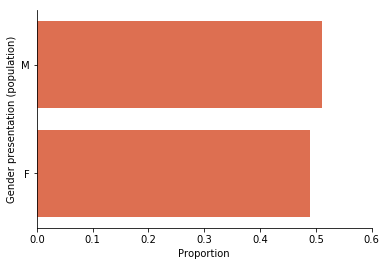

In [17]:
# create bar plot of gender statistics in Taiwan overall

sns.barplot(y="gender", x="freq", data=gender_df, color="#f4623a")
plt.ylabel("Gender presentation (population)")
plt.xlabel("Proportion")
plt.xlim([0,0.6])
plt.yticks([0,1],["M","F"])
sns.despine()
plt.savefig("docs/img/population_gender.png")

In [18]:
print("Population gender distribution")
print(gender_df)

Population gender distribution
  gender         n     freq
0      m  11386000  0.51056
1      f  10915000  0.48944


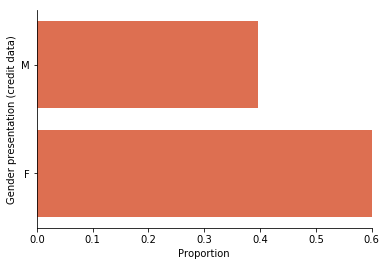

In [19]:
# create plot of gender statistics in credit dataset

sex_df = df.groupby("sex").count()["id"]
male_freq = sex_df[1] / sex_df.sum()
female_freq = sex_df[2] / sex_df.sum()
credit_gender_df = pd.DataFrame({"gender":["m","f"], "freq":[male_freq, female_freq]})

sns.barplot(y="gender", x="freq", data=credit_gender_df, color="#f4623a")
sns.despine()
plt.ylabel("Gender presentation (credit data)")
plt.xlabel("Proportion")
plt.xlim([0,0.6])
plt.yticks([0,1],["M","F"])
plt.savefig("docs/img/credit_gender.png")

In [20]:
print("Credit data gender distribution")
print(credit_gender_df)

Credit data gender distribution
  gender      freq
0      m  0.396267
1      f  0.603733


Women are overrepresented in the dataset compared to the overall Taiwan population.

In [21]:
# import marital status data for Taiwan

marital_df = pd.read_csv("data/marital.csv")

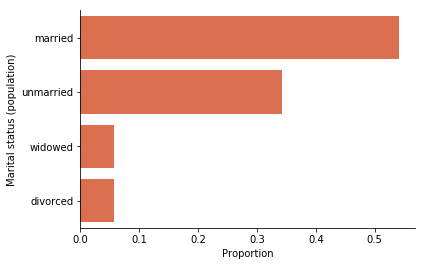

In [22]:
# create bar plot for marital status statistics over Taiwan

sns.barplot(y="marital_status", x="freq", data=marital_df, color="#f4623a")
sns.despine()
plt.ylabel("Marital status (population)")
plt.xlabel("Proportion")
plt.savefig("docs/img/population_marital.png")

In [23]:
print("Population marital status distribution")
print(marital_df)

Population marital status distribution
  marital_status    freq
0        married  0.5415
1      unmarried  0.3430
2        widowed  0.0575
3       divorced  0.0580


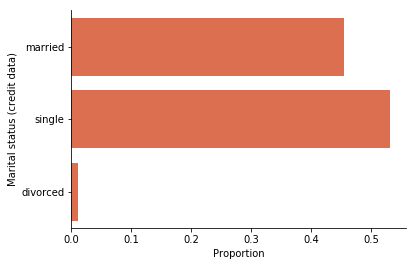

In [24]:
# create bar plot for marital status statistics in our credit dataset

married_freq = df.groupby("marriage")["id"].count()[1] / 30000
single_freq = df.groupby("marriage")["id"].count()[2] / 30000
divorced_freq = df.groupby("marriage")["id"].count()[3] / 30000

credit_marital_df = pd.DataFrame({"status":["married","single", "divorced"],
                                  "freq":[married_freq, single_freq, divorced_freq]})

sns.barplot(y="status", x="freq", data=credit_marital_df, color="#f4623a")
sns.despine()
plt.ylabel("Marital status (credit data)")
plt.xlabel("Proportion")
plt.savefig("docs/img/credit_marital.png")

In [25]:
print("Credit data marital status distribution")
print(credit_marital_df)

Credit data marital status distribution
     status      freq
0   married  0.455300
1    single  0.532133
2  divorced  0.010767


While the majority of the Taiwanese population is married, the majority of the people represented in the credit dataset are single. The data further includes as disproportionately small number of divorced individuals. 

So far we have compared the demographics in our credit defaulting dataset to the overall demographics for the Taiwan population. 

Let's check if there is any substantial differences in attributes for male versus female credit card owners.

### Comparing male vs. female statistics

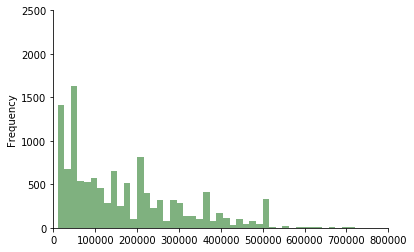

In [26]:
# separate dataframes based on gender 

male_df = df[df["sex"] == 1]
female_df = df[df["sex"] == 2]

# plot credit limit distribution for males

male_df["limit_bal"].plot.hist(bins=50, color='darkgreen', alpha=0.5)
plt.xlim([0,800000])
plt.ylim([0,2500])
sns.despine()

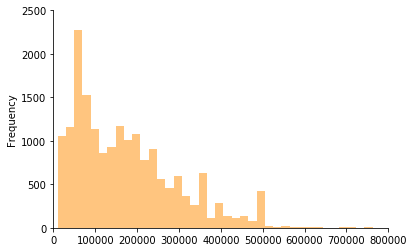

In [27]:
# plot credit limit distribution for females

female_df["limit_bal"].plot.hist(bins=50, color='darkorange', alpha=0.5)
plt.xlim([0,800000])
plt.ylim([0,2500])
sns.despine()

There seem to be only minor differences in the shape of the histograms, both being right-skewed.

In [28]:
# check descriptive statistics for male vs female datasets
male_df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
count,11888.000000,11888.000000,11888.0,11888.000000,11888.000000,11888.000000,11888.000000,11888.000000,11888.000000,11888.000000,...,11888.000000,11888.000000,11888.00000,11888.000000,11888.000000,11888.000000,11888.000000,11888.000000,11888.000000,11888.000000
mean,14802.770104,163519.825034,1.0,1.772544,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,...,45000.331090,41587.504963,40101.77532,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672
std,8957.861425,136250.481355,0.0,0.734273,0.518864,9.404555,1.131782,1.212816,1.212617,1.198274,...,67251.314983,63239.510286,62249.54505,15812.062952,18459.157003,18300.915102,16565.407969,15367.899454,18787.551688,0.428115
min,5.000000,10000.000000,1.0,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-61372.000000,-339603.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7056.750000,50000.000000,1.0,1.000000,1.000000,29.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2908.500000,2164.250000,1428.75000,1000.000000,863.500000,390.000000,300.000000,254.000000,0.000000,0.000000
50%,14083.500000,130000.000000,1.0,2.000000,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,...,19350.000000,18394.000000,17642.00000,2100.000000,2000.000000,1653.500000,1444.000000,1500.000000,1300.000000,0.000000
75%,23994.250000,240000.000000,1.0,2.000000,2.000000,43.000000,0.000000,0.000000,0.000000,0.000000,...,54985.500000,50283.000000,49243.50000,5011.000000,5000.000000,4409.000000,4003.500000,4000.000000,4000.000000,0.000000
max,30000.000000,800000.000000,1.0,3.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,628699.000000,823540.000000,699944.00000,505000.000000,388126.000000,508229.000000,528897.000000,332000.000000,527143.000000,1.000000


In [29]:
female_df.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
count,18112.000000,18112.000000,18112.0,18112.000000,18112.000000,18112.000000,18112.000000,18112.000000,18112.000000,18112.000000,...,18112.000000,18112.000000,18112.000000,18112.000000,1.811200e+04,18112.000000,18112.000000,18112.000000,18112.000000,18112.000000
mean,15130.282078,170086.462014,2.0,1.784673,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,...,42122.600099,39473.816807,38064.427286,5660.327076,5.895200e+03,5103.057255,4797.786992,4778.752043,5175.665305,0.207763
std,8457.209453,125231.777960,0.0,0.724643,0.523588,9.029441,1.115452,1.181829,1.182074,1.146077,...,62318.640022,59126.091369,57704.042067,17038.785342,2.560677e+04,17135.614417,15047.145044,15219.603007,17082.463071,0.405717
min,1.000000,10000.000000,2.0,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-81334.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7783.250000,70000.000000,2.0,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1988.750000,1599.500000,1152.500000,877.750000,8.157500e+02,396.000000,286.750000,252.500000,193.000000,0.000000
50%,15784.500000,150000.000000,2.0,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,...,18678.000000,17811.500000,16513.500000,2124.500000,2.033500e+03,1953.000000,1540.000000,1597.000000,1588.000000,0.000000
75%,22355.250000,240000.000000,2.0,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54179.750000,50073.500000,49146.250000,5005.000000,5.000000e+03,4600.000000,4030.750000,4106.250000,4150.000000,0.000000
max,29283.000000,1000000.000000,2.0,3.000000,3.000000,75.000000,8.000000,8.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


The statistics look very similar overall, but we will perform two t-tests to check for significant differences in mean credit limit and in default rate.

In [30]:
# t-test for credit limit
stats.ttest_ind(male_df["limit_bal"], female_df["limit_bal"])

Ttest_indResult(statistic=-4.288903937895565, pvalue=1.8011800666712788e-05)

In [31]:
# t-test for mean default rate
stats.ttest_ind(male_df["default"], female_df["default"])

Ttest_indResult(statistic=6.926677006157903, pvalue=4.3952488032748674e-12)

Based on the t-tests, it seems like there is a significant difference between the mean credit limit for men versus women, with women having higher credit limit (approximately 163500 versus 170000). The same is true for default rate, where men default on their credit more often than women (0.24 versus 0.21). 

In [32]:
print("The proportion of people who default on their loan is %s." %(len(df[df['default']==1])/len(df)))

The proportion of people who default on their loan is 0.2212.


Next we will one-hot encode our categorical variables for further analysis.

In [33]:
# get dummy variables
df_mod = pd.get_dummies(df, columns=["sex", "education", "marriage"])

In [34]:
# rename dummy variables appropriately
df_mod = df_mod.rename(columns={
    "education_1": "education_grad",
    "education_2": "education_univ",
    "education_3": "education_high",
    "education_4": "education_others",
    "marriage_1": "marriage_married",
    "marriage_2": "marriage_single",
    "marriage_3": "marriage_divorced",
    "sex_1": "gender_male",
    "sex_2": "gender_female"
})

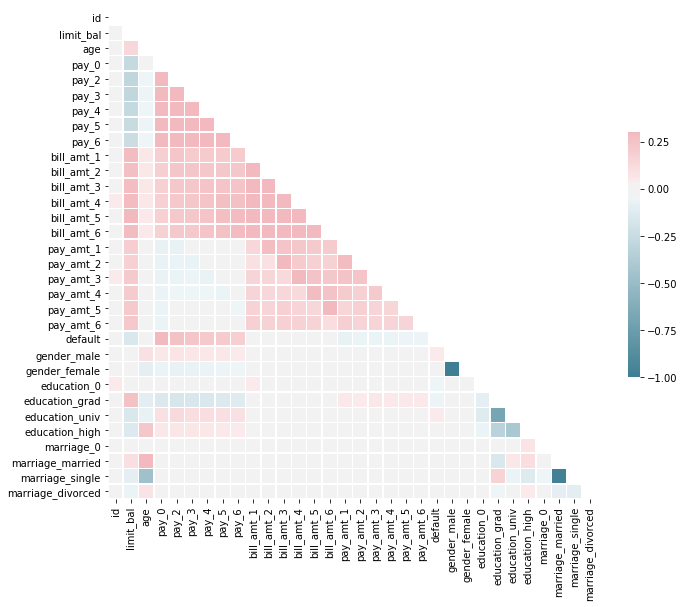

In [35]:
# adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Compute the correlation matrix
corr = df_mod.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<a id='section2'></a>

## Data Wrangling

First, we will modify the data for the purposes of model interpretability. Specifically, we will lump all no-delay categories into only one(0) for history of payment.

In [36]:
# for every variable denoting history of payment for a month
# create new variable based on history of payment
# 0 if there is no delay, no consumption, revolving credit
# keep the other values showing the number of months the payment was late

for i in list([0,2,3,4,5,6]):
    df_mod[str('delay_')+str(i)] = df_mod[str('pay_')+str(i)]
    df_mod.loc[df_mod[str('delay_')+str(i)]<0, (str('delay_')+str(i))] = 0

In [37]:
df_mod.head()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,...,marriage_0,marriage_married,marriage_single,marriage_divorced,delay_0,delay_2,delay_3,delay_4,delay_5,delay_6
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,0,2,2,0,0,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,0,1,0,0,2,0,0,0,2
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,1,0,0,0,0,0,0,0,0


In [38]:
# drop original history of payment variables
df_mod = df_mod.drop(['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], axis=1)

In [39]:
# drop rows that included undocumented values (522)
df_mod = df_mod[df_mod["education_0"] == 0]
df_mod = df_mod[df_mod["marriage_0"] == 0]

In [40]:
# with sensitive attributes
x = df_mod.drop(columns=['id', 'default'])

In [41]:
# dropping some variables to get baselines
x = x.drop(columns=[
    "gender_female",
    "education_0",
    "marriage_0",
    "marriage_single",
    "education_high"
])

# split data into train and test
y = np.array(df_mod['default'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)

<a id='section3'></a>

## Models using entire dataset

In order to see the effect of using sensitive attributes in our credit defaulting algorithms, we will train models with and without the sensitive attributes.

###  Logistic Regression

In [42]:
# function that fits an sklearn model with hyperparameters that have been specified
# reports model performance

def get_model(model, x_train, y_train, x_test, y_test):
    # fit model
    model.fit(x_train, y_train)
    y_hat_train = model.predict(x_train)
    y_hat_test = model.predict(x_test)
    
    # print classification report
    print(classification_report(y_test, y_hat_test, target_names=["no default", "default"]))
    
    # report accuracy for test
    print("Train accuracy CV: {:.4f}".format(accuracy_score(y_train, y_hat_train)))
    print("Test accuracy CV: {:.4f}".format(accuracy_score(y_test, y_hat_test)))
    print("")
    
    # confusion matrix for test
    conf_mat = confusion_matrix(y_test, y_hat_test)
    print("Confusion matrix for test set:")
    
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap=sns.cubehelix_palette(light=1, as_cmap=True),
                xticklabels=["pred default", "pred no default"], yticklabels=["true default ", "true no default"])
    plt.show()
    sns.despine()
    
    # TPR, AUC
    tn, fp, fn, tp = conf_mat.ravel()
    print("TPR for test, subset: {:.4f}".format(tp/(tp+fn)))
    
    y_hat_test_probs = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_hat_test_probs)
    roc_auc = auc(fpr, tpr)
    print("AUC for test, subset: {:.4f}".format(roc_auc))
    
    return model, (y_test, y_hat_test_probs)

             precision    recall  f1-score   support

 no default       0.87      0.84      0.86      4576
    default       0.51      0.56      0.54      1320

avg / total       0.79      0.78      0.78      5896

Train accuracy CV: 0.7779
Test accuracy CV: 0.7810

Confusion matrix for test set:


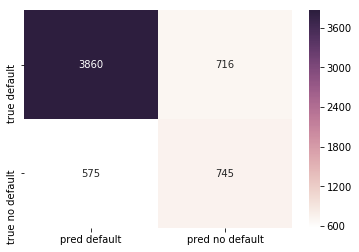

TPR for test, subset: 0.5644
AUC for test, subset: 0.7624
CPU times: user 1.45 s, sys: 93.5 ms, total: 1.54 s
Wall time: 10.7 s


<Figure size 432x288 with 0 Axes>

In [43]:
%%time
# Let's fit a simple logistic regression
logistic_regression, logistic_regression_info = get_model(LogisticRegressionCV(
                                    random_state=42,
                                    Cs=10,
                                    class_weight="balanced",
                                    penalty="l1",
                                    cv=5,
                                    solver="liblinear",
                                    n_jobs=4),
                                x_train, y_train, x_test, y_test)

In [44]:
# check coefficients for logistic regression
for col, coeff in zip(x.columns, logistic_regression.coef_[0]):
    print("{}: {:.4f}".format(col, coeff))

limit_bal: -0.0000
age: 0.0042
bill_amt_1: -0.0000
bill_amt_2: 0.0000
bill_amt_3: 0.0000
bill_amt_4: -0.0000
bill_amt_5: -0.0000
bill_amt_6: -0.0000
pay_amt_1: -0.0000
pay_amt_2: -0.0000
pay_amt_3: -0.0000
pay_amt_4: -0.0000
pay_amt_5: -0.0000
pay_amt_6: -0.0000
gender_male: 0.1058
education_grad: 0.0000
education_univ: 0.0000
marriage_married: 0.1362
marriage_divorced: 0.0000
delay_0: 0.8901
delay_2: 0.0833
delay_3: 0.1542
delay_4: 0.1025
delay_5: 0.1122
delay_6: 0.1214


### Random Forest

             precision    recall  f1-score   support

 no default       0.83      0.94      0.89      4576
    default       0.65      0.35      0.45      1320

avg / total       0.79      0.81      0.79      5896

Train accuracy CV: 0.9992
Test accuracy CV: 0.8116

Confusion matrix for test set:


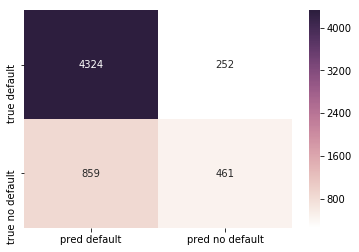

TPR for test, subset: 0.3492
AUC for test, subset: 0.7635


<Figure size 432x288 with 0 Axes>

In [45]:
# Let's fit a random forest
random_forest, random_forest_info = get_model(RandomForestClassifier(n_estimators=100,
                                         criterion="entropy",
                                         random_state=42,
                                         max_features="log2",
                                         class_weight="balanced",
                                         n_jobs=4),
                  x_train, y_train, x_test, y_test)

In [46]:
# look into feature importance
for col, coeff in zip(x.columns, random_forest.feature_importances_):
    print("{}: {:.4f}".format(col, coeff))

limit_bal: 0.0663
age: 0.0674
bill_amt_1: 0.0684
bill_amt_2: 0.0589
bill_amt_3: 0.0567
bill_amt_4: 0.0549
bill_amt_5: 0.0543
bill_amt_6: 0.0539
pay_amt_1: 0.0572
pay_amt_2: 0.0541
pay_amt_3: 0.0521
pay_amt_4: 0.0488
pay_amt_5: 0.0491
pay_amt_6: 0.0502
gender_male: 0.0129
education_grad: 0.0102
education_univ: 0.0107
marriage_married: 0.0119
marriage_divorced: 0.0015
delay_0: 0.0725
delay_2: 0.0313
delay_3: 0.0181
delay_4: 0.0127
delay_5: 0.0136
delay_6: 0.0124


### kNN

             precision    recall  f1-score   support

 no default       0.80      0.91      0.85      4576
    default       0.39      0.19      0.26      1320

avg / total       0.71      0.75      0.72      5896

Train accuracy CV: 0.8159
Test accuracy CV: 0.7519

Confusion matrix for test set:


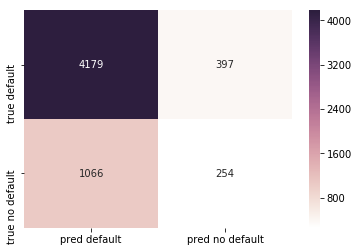

TPR for test, subset: 0.1924
AUC for test, subset: 0.6151


<Figure size 432x288 with 0 Axes>

In [47]:
# Lastly, let's fit KNN
knn, knn_info = get_model(KNeighborsClassifier(n_neighbors=5),
          x_train, y_train, x_test, y_test)

<a id='section4'></a>

## Models without sensitive attributes

In [48]:
# Let's fit models that don't use protected categories as covariates
protected = [
    "education_grad",
    "education_univ",
    "marriage_married",
    "marriage_divorced",
    "gender_male",
    "age"
]

In [49]:
# with sensitive attributes
x_fair_train = x_train.drop(columns=protected)
x_fair_test = x_test.drop(columns=protected)

### Logistic Regression

             precision    recall  f1-score   support

 no default       0.86      0.87      0.86      4576
    default       0.52      0.50      0.51      1320

avg / total       0.78      0.79      0.78      5896

Train accuracy CV: 0.7886
Test accuracy CV: 0.7853

Confusion matrix for test set:


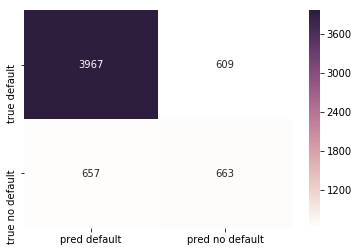

TPR for test, subset: 0.5023
AUC for test, subset: 0.7478


<Figure size 432x288 with 0 Axes>

In [50]:
# fit logistic regression
logistic_regression_fair, logistic_regression_fair_info = get_model(LogisticRegressionCV(random_state=42,
                                       Cs=10,
                                       class_weight="balanced",
                                       penalty="l1",
                                       cv=5,
                                       solver="liblinear",
                                       n_jobs=4),
                  x_fair_train, y_train, x_fair_test, y_test)

In [51]:
# let's understand the coefficients
for col, coeff in zip(x_fair_train.columns, logistic_regression_fair.coef_[0]):
    print("{}: {:.4f}".format(col, coeff))

limit_bal: -0.0000
bill_amt_1: -0.0000
bill_amt_2: 0.0000
bill_amt_3: 0.0000
bill_amt_4: -0.0000
bill_amt_5: 0.0000
bill_amt_6: 0.0000
pay_amt_1: -0.0000
pay_amt_2: -0.0000
pay_amt_3: -0.0000
pay_amt_4: -0.0000
pay_amt_5: -0.0000
pay_amt_6: -0.0000
delay_0: 0.5892
delay_2: 0.0359
delay_3: 0.0280
delay_4: 0.0000
delay_5: 0.0000
delay_6: 0.0000


### Random Forest

             precision    recall  f1-score   support

 no default       0.84      0.93      0.88      4576
    default       0.61      0.37      0.46      1320

avg / total       0.79      0.81      0.79      5896

Train accuracy CV: 0.9859
Test accuracy CV: 0.8053

Confusion matrix for test set:


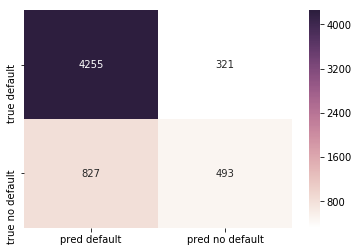

TPR for test, subset: 0.3735
AUC for test, subset: 0.7570


<Figure size 432x288 with 0 Axes>

In [52]:
# fit random forest
random_forest_fair, random_forest_fair_info = get_model(RandomForestClassifier(n_estimators=100,
                                 criterion="entropy",
                                 random_state=42,
                                 max_features="log2",
                                 class_weight="balanced",
                                 n_jobs=4),
          x_fair_train, y_train, x_fair_test, y_test)

In [53]:
# look into feature importance
for col, coeff in zip(x_fair_train.columns, random_forest_fair.feature_importances_):
    print("{}: {:.4f}".format(col, coeff))

limit_bal: 0.0709
bill_amt_1: 0.0820
bill_amt_2: 0.0694
bill_amt_3: 0.0643
bill_amt_4: 0.0632
bill_amt_5: 0.0622
bill_amt_6: 0.0631
pay_amt_1: 0.0648
pay_amt_2: 0.0626
pay_amt_3: 0.0592
pay_amt_4: 0.0563
pay_amt_5: 0.0555
pay_amt_6: 0.0586
delay_0: 0.0792
delay_2: 0.0334
delay_3: 0.0184
delay_4: 0.0143
delay_5: 0.0134
delay_6: 0.0093


### kNN

             precision    recall  f1-score   support

 no default       0.79      0.93      0.86      4576
    default       0.39      0.16      0.23      1320

avg / total       0.70      0.76      0.72      5896

Train accuracy CV: 0.8032
Test accuracy CV: 0.7564

Confusion matrix for test set:


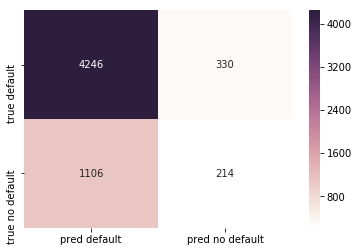

TPR for test, subset: 0.1621
AUC for test, subset: 0.6190


<Figure size 432x288 with 0 Axes>

In [54]:
knn_fair, knn_fair_info = get_model(KNeighborsClassifier(n_neighbors=7,
                               n_jobs=4),
        x_fair_train, y_train, x_fair_test, y_test)

In [55]:
# plot ROC curves for all our models

model_infos = {
    "LR (A)": logistic_regression_info,
    "RF (A)": random_forest_info,
    "KNN (A)": knn_info,
    "LR (B)": logistic_regression_fair_info,
    "RF (B)": random_forest_fair_info,
    "KNN (B)": knn_fair_info,  
}

graph_style = {
    "LR (A)": (sns.color_palette()[0], "solid"),
    "RF (A)": (sns.color_palette()[1], "solid"),
    "KNN (A)": (sns.color_palette()[2], "solid"),
    "LR (B)": (sns.color_palette()[0], "dotted"),
    "RF (B)": (sns.color_palette()[1], "dotted"),
    "KNN (B)": (sns.color_palette()[2], "dotted"),
}

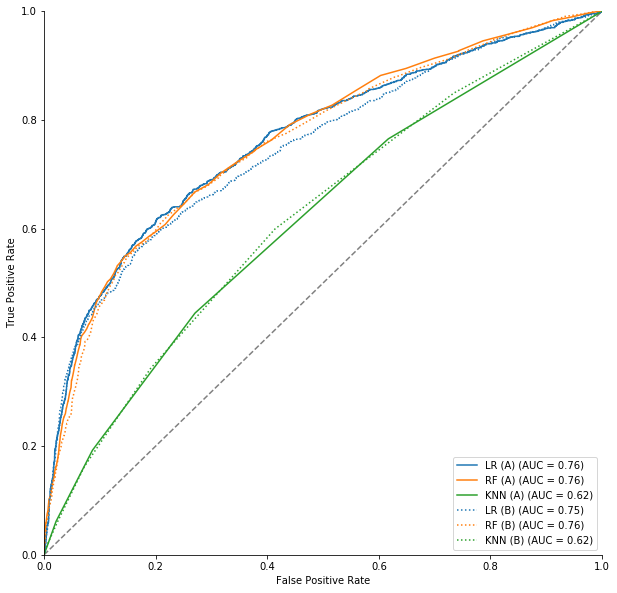

In [56]:
# adapted from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

plt.figure(figsize=(10,10))
plt.plot([0,1], [0,1], linestyle="dashed", color="gray")

for model_name, model_info in model_infos.items():
    fpr, tpr, thresholds = roc_curve(model_info[0], model_info[1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             color=graph_style[model_name][0], linestyle=graph_style[model_name][1],
             label="{} (AUC = {:.2f})".format(model_name, roc_auc))

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
sns.despine()
plt.savefig("docs/img/roc_plot.png", transparent=True)
plt.show()

### Observations
* The models that don't incorporate protected categories are pretty good.
* For RF and LR, the removal of protected categories results in a slight decrease in performance.
* For KNN, removing protected categories even improved performance.

<a id='section5'></a>

## Disparate impact: Plotting ROC curves

In [62]:
# function that plots ROC curves for different cuts (buckets) of the data

def bucket_plot(buckets, filename, title):
    # Plot ROC curve
    # adapted from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.plot([0,1], [0,1], linestyle="dashed", color="gray")

    for name, mask in buckets.items():
        y_test = random_forest_fair_info[0][mask]
        y_hat_probs = random_forest_fair_info[1][mask]
        fpr, tpr, thresholds = roc_curve(y_test, y_hat_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, linestyle="dotted",
             label="{} (AUC = {:.2f})".format(name, roc_auc))


    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc=4)
    sns.despine()
    plt.savefig(filename, transparent=True)
    plt.show()

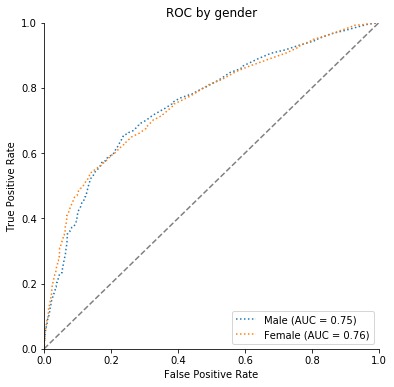

In [63]:
# plot ROC curve by gender

gender_buckets = {
    "Male": x_test["gender_male"] == 1,
    "Female": x_test["gender_male"] == 0
}
bucket_plot(gender_buckets, "docs/img/roc_by_gender_plot.png", "ROC by gender")

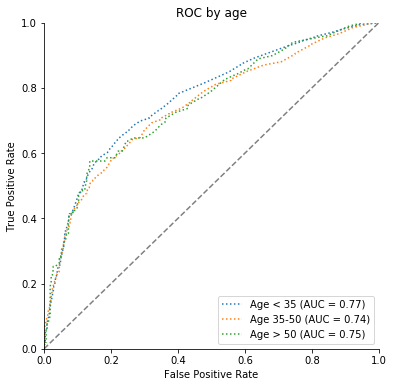

In [64]:
# plot ROC curve by age

age_buckets = {
    "Age < 35": x_test["age"] <= 34,
    "Age 35-50": (x_test["age"] >= 35) & (x_test["age"] <= 50),
    "Age > 50": x_test["age"] >= 51
}
bucket_plot(age_buckets, "docs/img/roc_by_age_plot.png", "ROC by age")

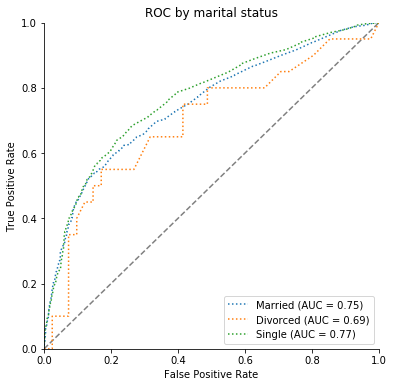

In [65]:
# plot ROC curve by marital status

marital_buckets = {
    "Married": x_test["marriage_married"] == 1,
    "Divorced": x_test["marriage_divorced"] == 1,
    "Single": (x_test["marriage_married"] == 0) & (x_test["marriage_divorced"] == 0)
}
bucket_plot(marital_buckets, "docs/img/roc_by_marital_plot.png", "ROC by marital status")

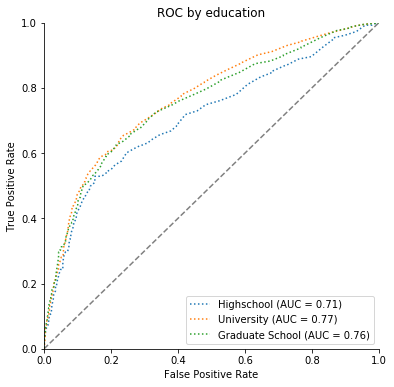

In [66]:
# plot ROC curve by education

edu_buckets = {
    "Highschool": (x_test["education_grad"] == 0) & (x_test["education_univ"] == 0),
    "University": x_test["education_univ"] == 1,
    "Graduate School": x_test["education_grad"] == 1
}
bucket_plot(edu_buckets, "docs/img/roc_by_edu_plot.png", "ROC by education")